In [1]:
%matplotlib inline
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

In [2]:
simdisk_dirname = "/Volumes/simulation_data_2018/reduced_snaps_v2"
nersc_dirname = "/global/u1/a/aphearin/reduced_galacticus_snaps"
import os
fname = os.path.join(simdisk_dirname, "reduced_259_magr-16.hdf5")

from astropy.table import Table
pdc2_v2_z1_snap = Table.read(fname, path='data')
print(pdc2_v2_z1_snap.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['isCentral', 'redshift', 'hostHaloMass', 'blackHoleMass', 'totalMassStellar', 'mag_u_rest', 'mag_u_obs', 'mag_g_rest', 'mag_g_obs', 'mag_r_rest', 'mag_r_obs', 'mag_i_rest', 'mag_i_obs', 'mag_z_rest', 'mag_z_obs']


In [3]:
fname = os.path.join(simdisk_dirname, "reduced_331_magr-16.hdf5")
from astropy.table import Table
pdc2_v2_z0p5_snap = Table.read(fname, path='data')
print(pdc2_v2_z0p5_snap.keys())

['isCentral', 'redshift', 'hostHaloMass', 'blackHoleMass', 'totalMassStellar', 'mag_u_rest', 'mag_u_obs', 'mag_g_rest', 'mag_g_obs', 'mag_r_rest', 'mag_r_obs', 'mag_i_rest', 'mag_i_obs', 'mag_z_rest', 'mag_z_obs']


In [4]:
fname = os.path.join(simdisk_dirname, "reduced_499_magr-16.hdf5")
from astropy.table import Table
pdc2_v2_z0p0_snap = Table.read(fname, path='data')
print(pdc2_v2_z0p0_snap.keys())

['isCentral', 'redshift', 'hostHaloMass', 'blackHoleMass', 'totalMassStellar', 'mag_u_rest', 'mag_u_obs', 'mag_g_rest', 'mag_g_obs', 'mag_r_rest', 'mag_r_obs', 'mag_i_rest', 'mag_i_obs', 'mag_z_rest', 'mag_z_obs']


In [5]:
simdisk_dirname = "/Volumes/simulation_data_2018/protoDC2_v4p3"
import os
fname = os.path.join(simdisk_dirname, "v4.3.full.all.aph_reduced.hdf5")
pdc2_v4p3 = Table.read(fname, path='data')
print(pdc2_v4p3.keys())

['um_host_halo_mvir', 'um_obs_sm', 'um_obs_sfr', 'um_redshift', 'um_sfr_percentile', 'um_upid', 'um_mpeak', 'um_restframe_extincted_sdss_abs_magr', 'um_restframe_extincted_sdss_gr', 'um_restframe_extincted_sdss_ri', 'um_is_on_red_sequence_gr', 'um_is_on_red_sequence_ri', 'isCentral', 'redshift', 'hostHaloMass', 'blackHoleMass', 'totalMassStellar', 'blackHoleAccretionRate', 'blackHoleEddingtonRatio', 'mag_u_rest', 'mag_u_obs', 'mag_g_rest', 'mag_g_obs', 'mag_r_rest', 'mag_r_obs', 'mag_i_rest', 'mag_i_obs', 'mag_z_rest', 'mag_z_obs']


In [6]:
# obs_r_mag_limit = 24.0
# obs_r_mask = pdc2_v2_z1_snap['mag_r_obs'] < obs_r_mag_limit
# ngals = np.count_nonzero(obs_r_mask)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(pdc2_v2_z1_snap['mag_r_rest'][obs_r_mask], bins=150, normed=True, alpha=0.8)
# xlim = ax.set_xlim(-18, -25)

In [7]:
# faint, bright = -20, -21
# abs_r_mask = (pdc2_v2_z1_snap['mag_r_rest'] < faint) & (pdc2_v2_z1_snap['mag_r_rest'] >= bright)

# fig, ax = plt.subplots(1, 1)

# mask = abs_r_mask & obs_r_mask
# ri_bins = np.linspace(0, 1,100)
# __=ax.hist(pdc2_v2_z1_snap['mag_g_obs'][mask]-pdc2_v2_z1_snap['mag_r_obs'][mask], bins=ri_bins, normed=True)
# xlim = ax.set_xlim(-0.25, 1.25)

In [8]:
# fig, ax = plt.subplots(1, 1)

# mask = abs_r_mask & obs_r_mask
# ri_bins = np.linspace(0, 1,100)
# # __=ax.hist(mock['mag_r_rest'][mask]-mock['mag_i_rest'][mask], bins=ri_bins, normed=True)
# __=ax.hist(pdc2_v2_z1_snap['mag_g_rest'][mask]-pdc2_v2_z1_snap['mag_r_rest'][mask], bins=ri_bins, normed=True)
# xlim = ax.set_xlim(-0.25, 1.25)

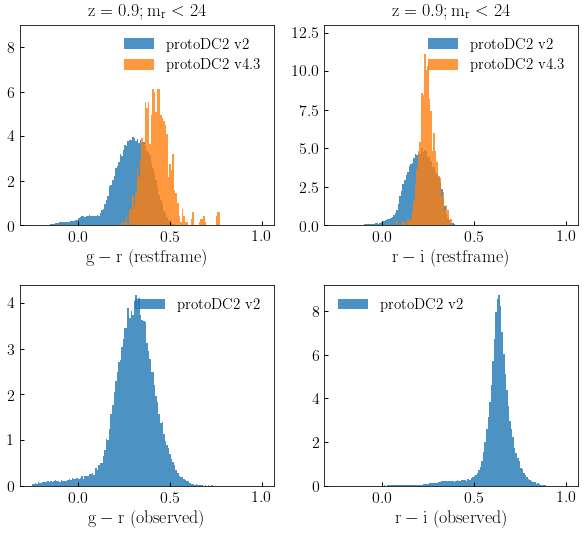

In [9]:
faint, bright = -20, -21
obs_r_mag_limit = 24.0
zlo, zhi = 0.85, 0.95

abs_r_mask = (pdc2_v2_z1_snap['mag_r_rest'] < faint) & (pdc2_v2_z1_snap['mag_r_rest'] >= bright)
obs_r_mask = pdc2_v2_z1_snap['mag_r_obs'] < obs_r_mag_limit
mask = abs_r_mask & obs_r_mask

abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
obs_r_mask2 = pdc2_v4p3['mag_r_obs'] < obs_r_mag_limit
redshift_mask2 = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)
mask2 = abs_r_mask2 & obs_r_mask2 & redshift_mask2


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

gr_bins = np.linspace(-0.25, 1, 150)
ri_bins = np.linspace(-0.25, 1, 150)

__=ax1.hist(pdc2_v2_z1_snap['mag_g_rest'][mask]-pdc2_v2_z1_snap['mag_r_rest'][mask], 
            bins=gr_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax2.hist(pdc2_v2_z1_snap['mag_r_rest'][mask]-pdc2_v2_z1_snap['mag_i_rest'][mask], 
            bins=ri_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax3.hist(pdc2_v2_z1_snap['mag_g_obs'][mask]-pdc2_v2_z1_snap['mag_r_obs'][mask], 
            bins=gr_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax4.hist(pdc2_v2_z1_snap['mag_r_obs'][mask]-pdc2_v2_z1_snap['mag_i_obs'][mask], 
            bins=ri_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v2}$')

__=ax1.hist(pdc2_v4p3['mag_g_rest'][mask2]-pdc2_v4p3['mag_r_rest'][mask2], 
            bins=gr_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax2.hist(pdc2_v4p3['mag_r_rest'][mask2]-pdc2_v4p3['mag_i_rest'][mask2], 
            bins=ri_bins, normed=True,
           alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
# __=ax3.hist(pdc2_v4p3['mag_g_obs'][mask2]-pdc2_v4p3['mag_r_obs'][mask2], 
#             bins=gr_bins, normed=True,
#            alpha=0.8, label=r'${\rm protoDC2\ v4.3\ z=0.9}$')
# __=ax4.hist(pdc2_v4p3['mag_r_obs'][mask2]-pdc2_v4p3['mag_i_obs'][mask2], 
#             bins=ri_bins, normed=True,
#            alpha=0.8, label=r'${\rm protoDC2\ v4.3\ z=0.9}$')


xlabel1 = ax1.set_xlabel(r'${\rm g-r\ (restframe)}$')
xlabel2 = ax2.set_xlabel(r'${\rm r-i\ (restframe)}$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r\ (observed)}$')
xlabel4 = ax4.set_xlabel(r'${\rm r-i\ (observed)}$')

title1 = ax1.set_title(r'${\rm z=0.9; m_{\rm r} < 24}$')
title2 = ax2.set_title(r'${\rm z=0.9; m_{\rm r} < 24}$')

leg1 = ax1.legend(frameon=False)
leg2 = ax2.legend(frameon=False)
leg3 = ax3.legend(frameon=False)
leg4 = ax4.legend(frameon=False)

ylim1 = ax1.set_ylim(0, 9)
ylim2 = ax2.set_ylim(0, 13)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.3   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top,
                wspace=wspace, hspace=hspace)

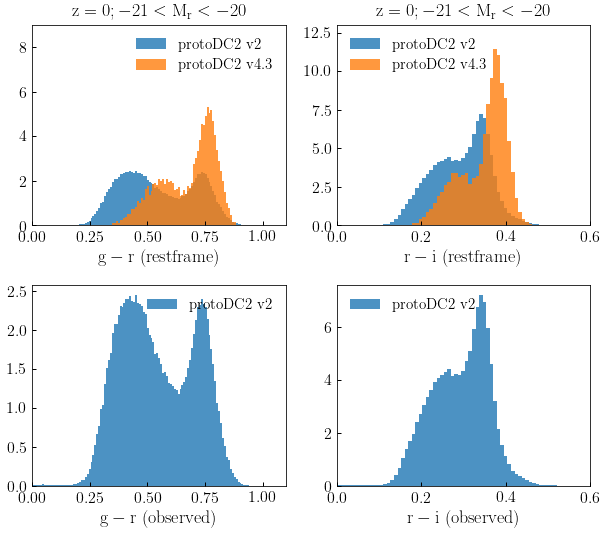

In [17]:
faint, bright = -20, -21
zlo, zhi = 0., 0.25

abs_r_mask = (pdc2_v2_z0p0_snap['mag_r_rest'] < faint) & (pdc2_v2_z0p0_snap['mag_r_rest'] >= bright)
obs_r_mask = pdc2_v2_z0p0_snap['mag_r_obs'] < obs_r_mag_limit
mask = abs_r_mask & obs_r_mask

abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
obs_r_mask2 = pdc2_v4p3['mag_r_obs'] < obs_r_mag_limit
redshift_mask2 = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)
mask2 = abs_r_mask2 & obs_r_mask2 & redshift_mask2


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

gr_bins = np.linspace(-0.25, 1, 150)
ri_bins = np.linspace(-0.25, 1, 150)

__=ax1.hist(pdc2_v2_z0p0_snap['mag_g_rest'][mask]-pdc2_v2_z0p0_snap['mag_r_rest'][mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax2.hist(pdc2_v2_z0p0_snap['mag_r_rest'][mask]-pdc2_v2_z0p0_snap['mag_i_rest'][mask], 
            bins=ri_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax3.hist(pdc2_v2_z0p0_snap['mag_g_obs'][mask]-pdc2_v2_z0p0_snap['mag_r_obs'][mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax4.hist(pdc2_v2_z0p0_snap['mag_r_obs'][mask]-pdc2_v2_z0p0_snap['mag_i_obs'][mask], 
            bins=ri_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')

__=ax1.hist(pdc2_v4p3['mag_g_rest'][mask2]-pdc2_v4p3['mag_r_rest'][mask2], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax2.hist(pdc2_v4p3['mag_r_rest'][mask2]-pdc2_v4p3['mag_i_rest'][mask2], 
            bins=ri_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')


xlabel1 = ax1.set_xlabel(r'${\rm g-r\ (restframe)}$')
xlabel2 = ax2.set_xlabel(r'${\rm r-i\ (restframe)}$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r\ (observed)}$')
xlabel4 = ax4.set_xlabel(r'${\rm r-i\ (observed)}$')

title1 = ax1.set_title(r'${\rm z=0; -21 < M_{\rm r} < -20}$')
title2 = ax2.set_title(r'${\rm z=0; -21 < M_{\rm r} < -20}$')

leg1 = ax1.legend(frameon=False)
leg2 = ax2.legend(frameon=False)
leg3 = ax3.legend(frameon=False)
leg4 = ax4.legend(frameon=False)

ylim1 = ax1.set_ylim(0, 9)
ylim2 = ax2.set_ylim(0, 13)

xmin, xmax = 0, 1.1
xmin2, xmax2 = 0, 0.6
xlim1 = ax1.set_xlim(xmin, xmax)
xlim2 = ax2.set_xlim(xmin2, xmax2)
xlim3 = ax3.set_xlim(xmin, xmax)
xlim4 = ax4.set_xlim(xmin2, xmax2)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.3   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top,
                wspace=wspace, hspace=hspace)

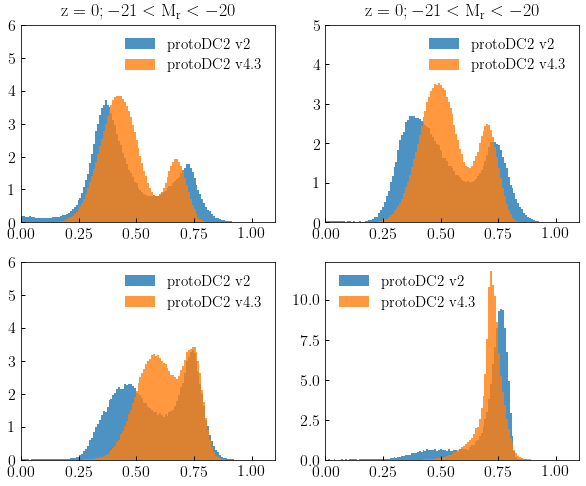

In [27]:
zlo, zhi = 0., 0.25
galacticus_mock = pdc2_v2_z0p0_snap


abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
obs_r_mask2 = pdc2_v4p3['mag_r_obs'] < obs_r_mag_limit
redshift_mask2 = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)
mask2 = abs_r_mask2 & obs_r_mask2 & redshift_mask2


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

gr_bins = np.linspace(-0.25, 1, 150)
ri_bins = np.linspace(-0.25, 1, 150)

faint, bright = -18.5, -19.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint) & (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
__=ax1.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax1.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2]-pdc2_v4p3['mag_r_rest'][abs_r_mask2], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')

faint, bright = -19.5, -20.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint) & (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
__=ax2.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax2.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2]-pdc2_v4p3['mag_r_rest'][abs_r_mask2], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')

faint, bright = -20.5, -21.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint) & (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
__=ax3.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax3.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2]-pdc2_v4p3['mag_r_rest'][abs_r_mask2], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')


faint, bright = -21.5, -np.inf
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint) & (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
__=ax4.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax4.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2]-pdc2_v4p3['mag_r_rest'][abs_r_mask2], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')

# __=ax2.hist(galacticus_mock['mag_r_rest'][mask]-galacticus_mock['mag_i_rest'][mask], 
#             bins=ri_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
# __=ax3.hist(galacticus_mock['mag_g_obs'][mask]-galacticus_mock['mag_r_obs'][mask], 
#             bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
# __=ax4.hist(galacticus_mock['mag_r_obs'][mask]-galacticus_mock['mag_i_obs'][mask], 
#             bins=ri_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')

leg1 = ax1.legend()
leg2 = ax2.legend()
leg3 = ax3.legend()
leg4 = ax4.legend()

title1 = ax1.set_title(r'${\rm z=0; -21 < M_{\rm r} < -20}$')
title2 = ax2.set_title(r'${\rm z=0; -21 < M_{\rm r} < -20}$')

ylim1 = ax1.set_ylim(0, 6)
ylim2 = ax2.set_ylim(0, 5)
ylim3 = ax3.set_ylim(0, 6)
# ylim4 = ax4.set_ylim(0, 13)

xmin, xmax = 0, 1.1
xlim1 = ax1.set_xlim(xmin, xmax)
xlim2 = ax2.set_xlim(xmin, xmax)
xlim3 = ax3.set_xlim(xmin, xmax)
xlim4 = ax4.set_xlim(xmin, xmax)
